In [1]:
#-----------------------------------------------------------------------------------------------------------
# Imported the necessary libraries.
# Pandas is a library use for data manipulation and analysis
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
# To implement the Support Vector Machines we will use Scikit-learn and will import our SVM
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Importing the data or reading the data
# Reading the Image pixel details file created in Data Pre-processing module
# Creating data frame from imported csv file
df = pd.read_csv('output_file1.csv')

In [3]:
# Inout data frame have 3 columns.
# Filename Column - Shows the name of the image file in original Image set folder
# Pixel Column - Information from the each image
# Label Column - Label column has values of Categories (main folders). We have total 11 categories; 0,1,2,3,4,5,6,7,8,9,Unknown (10)
df.head()

,FileName,Pixel,Label
0,zero_1353.jpg,141 138 138 140 142 145 146 148 150 151 152 15...,0
1,zero_1450.jpg,142 140 138 138 141 144 145 146 150 150 149 15...,0
2,zero_1409.jpg,139 136 134 135 136 139 141 143 145 146 149 14...,0
3,zero_1351.jpg,139 139 138 139 143 144 146 147 149 151 153 15...,0
4,zero_1390.jpg,139 135 134 136 137 138 142 145 149 149 151 15...,0


In [4]:
# Format Pixel column in each row into arrays of float datatype values.
df['Pixel']=df['Pixel'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [5]:
df['Pixel']

0        [141.0, 138.0, 138.0, 140.0, 142.0, 145.0, 146...
1        [142.0, 140.0, 138.0, 138.0, 141.0, 144.0, 145...
2        [139.0, 136.0, 134.0, 135.0, 136.0, 139.0, 141...
3        [139.0, 139.0, 138.0, 139.0, 143.0, 144.0, 146...
4        [139.0, 135.0, 134.0, 136.0, 137.0, 138.0, 142...
                               ...                        
16496    [16.0, 4.0, 1.0, 1.0, 5.0, 11.0, 21.0, 28.0, 3...
16497    [157.0, 156.0, 165.0, 202.0, 206.0, 182.0, 180...
16498    [250.0, 251.0, 251.0, 251.0, 251.0, 251.0, 250...
16499    [199.0, 233.0, 230.0, 230.0, 229.0, 223.0, 207...
16500    [43.0, 42.0, 41.0, 44.0, 43.0, 42.0, 47.0, 46....
Name: Pixel, Length: 16501, dtype: object

In [6]:
# Printing a sample image from any one input row
a =df.iloc[1600,1]
b= a.reshape(64, 64)

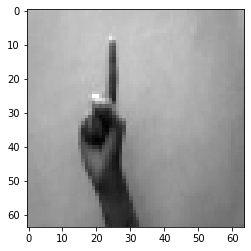

In [7]:
import matplotlib.pyplot as plt
plt.imshow(b, cmap = 'gray')

In [8]:
# Separate features and target columns from input dataset 
# We have only one feature i.s Pixel column
# Format Pixel column as list of data items
X = np.array(df['Pixel'].tolist())

# For SVM model it is must that we should have X and y i.e features and target less than or equal to 2 dimension.
X.shape

(16501, 4096)

In [9]:
# Our target columns is Label. We have total 11 categories.
y = np.array(df['Label'], dtype=int)

In [10]:
# Split X and y into Train and Test datasets
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size = 0.4, random_state=40)

In [11]:
# Create SVM model. We are using Gaussian's rbf kernel.
ModelSVM = svm.SVC(kernel="rbf")

In [12]:
# Fitting the Model
ModelSVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# Predict the target using test dataset
Y_pred1 = ModelSVM.predict(X_test)

In [14]:
# Prediction result
Y_pred1

array([8, 3, 7, ..., 7, 4, 9])

In [15]:
# Actual Value
Y_test

array([8, 3, 7, ..., 7, 4, 9])

In [16]:
# Calculage the accuracy score
svm_accuracy = round(accuracy_score(Y_test,Y_pred1)*100,2)

In [17]:
# Accuracy of svc model
svm_accuracy

79.99

In [18]:
# Import scikit-learn metrics module for accuracy calculation.
from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       567
           1       0.86      0.87      0.87       591
           2       0.77      0.79      0.78       585
           3       0.84      0.80      0.82       609
           4       0.75      0.75      0.75       627
           5       0.87      0.81      0.84       612
           6       0.89      0.80      0.84       595
           7       0.73      0.69      0.71       612
           8       0.72      0.76      0.74       615
           9       0.94      0.84      0.89       587
          10       0.69      0.81      0.75       601

    accuracy                           0.80      6601
   macro avg       0.80      0.80      0.80      6601
weighted avg       0.80      0.80      0.80      6601



Confusion matrix, without normalization
[[497   5  10   1   7   9  10   1   2   0  25]
 [ 11 517  17   3   8   4   3  10   7   1  10]
 [ 12  17 463   7  15   1  10  11   7   0  42]
 [  7  19  21 487  11  11   1  27  10   2  13]
 [ 33   4  19  13 471   7  11  15  24   2  28]
 [ 15   3   3  24  15 498   1   3  23   9  18]
 [  9   3  24   3  27   5 475  10  11   2  26]
 [ 11  10  21  15  27   2   5 424  64   2  31]
 [  9   7  11   8  13   6   2  72 467  14   6]
 [  7   3   5   5  21   4   0   2  28 495  17]
 [ 25  12   8  12  10  24  15   4   3   2 486]]
Normalized confusion matrix
[[0.87654321 0.00881834 0.01763668 0.00176367 0.01234568 0.01587302
  0.01763668 0.00176367 0.00352734 0.         0.04409171]
 [0.01861252 0.87478849 0.02876481 0.00507614 0.01353638 0.00676819
  0.00507614 0.01692047 0.01184433 0.00169205 0.01692047]
 [0.02051282 0.02905983 0.79145299 0.01196581 0.02564103 0.0017094
  0.01709402 0.01880342 0.01196581 0.         0.07179487]
 [0.01149425 0.03119869 0.03448276 0.

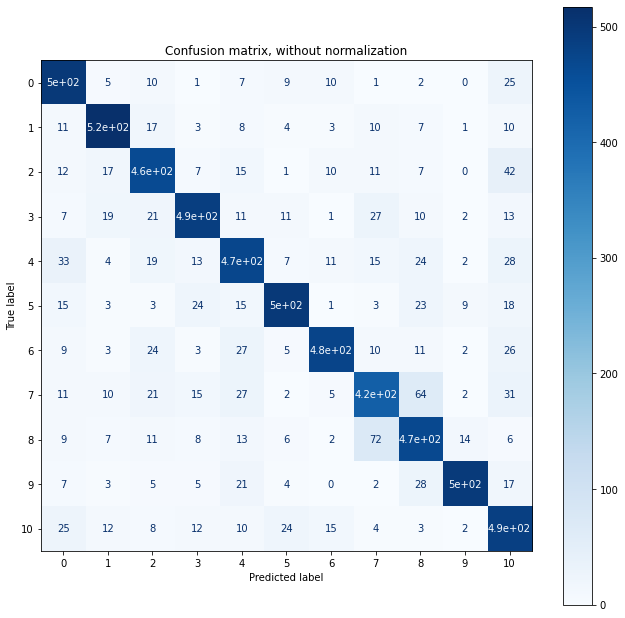

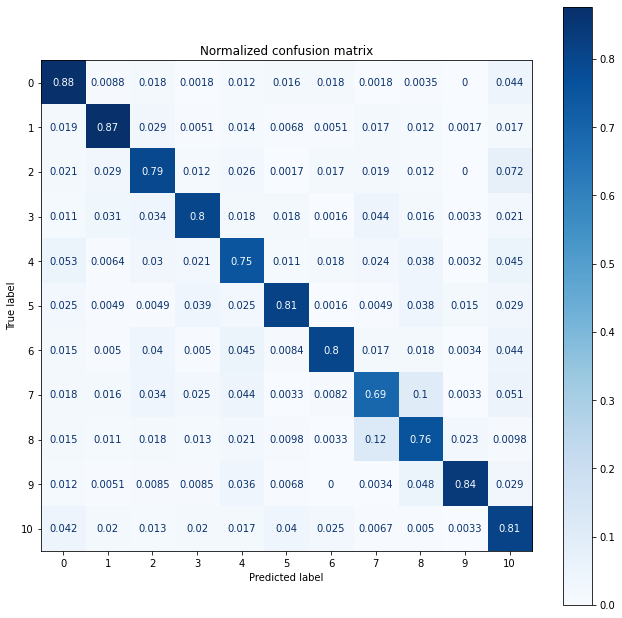

In [19]:
#Create confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['0','1','2','3','4','5','6','7','8','9','10']
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(11, 11))
    disp = plot_confusion_matrix(ModelSVM, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,ax=ax,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
# Method for displaying the original sign language image, predicted number and actual number.
# Imported Library for displaying image.
import matplotlib.pyplot as plt
def validate(ind,Model):
  # printing the image as per given input number.
  plt.imshow(df['Pixel'].iloc[ind].reshape(64,64))
  # Predicting the value from input pixel array for given input image number.
  test = np.array(df['Pixel'].iloc[ind])
  test = test.reshape(4096)
  pred_1= Model.predict(np.array([test]))
  print(pred_1)
      
  hand=int(pred_1)
  print("Predicted Number: "+ str(hand))
  print("Actual Number: "+ str(np.array(df['Label'].iloc[ind])))

[0]
Predicted Number: 0
Actual Number: 0


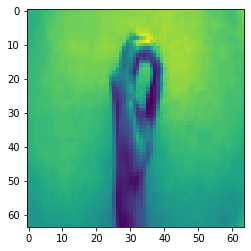

In [21]:
# Printing 50th number
validate(50,ModelSVM)

[0]
Predicted Number: 0
Actual Number: 0


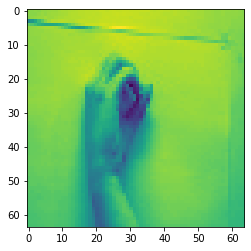

In [22]:
validate(200,ModelSVM)

[1]
Predicted Number: 1
Actual Number: 1


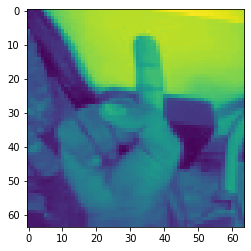

In [23]:
validate(1922,ModelSVM)

[5]
Predicted Number: 5
Actual Number: 5


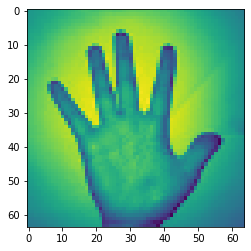

In [24]:
# printing 9000 number
validate(9000,ModelSVM)

In [25]:
print(np.array(Y_pred1.tolist()))

[8 3 7 ... 7 4 9]


In [26]:
# Creating Dataframes for prediction and actual values.
prd = pd.DataFrame(Y_pred1,columns=['Prediction'])
yts = pd.DataFrame(Y_test,columns=['Actual'])


In [27]:
# Concatinating predicted and actual values dataframes.
vi_df = pd.concat([prd, yts],axis = 1)
vi_df.head()

,Prediction,Actual
0,8,8
1,3,3
2,7,7
3,0,0
4,5,5


In [28]:
# Selecting 1st 50 row for better scale visualization.
fil_df = vi_df.loc[1:50]
fil_df.head()

,Prediction,Actual
1,3,3
2,7,7
3,0,0
4,5,5
5,8,8


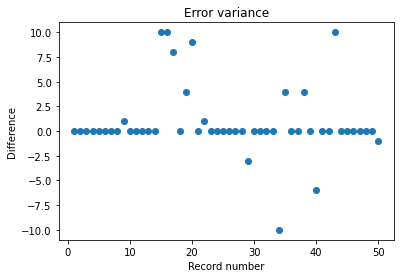

In [29]:
# This graph shows the error variance between actual value and predicted value for first 50 records.
g=plt.plot(fil_df['Actual'] - fil_df['Prediction'],marker='o',linestyle='')
# Naming x and y labels.
plt.xlabel('Record number')
plt.ylabel('Difference')
# Printing title
plt.title('Error variance')
plt.show()


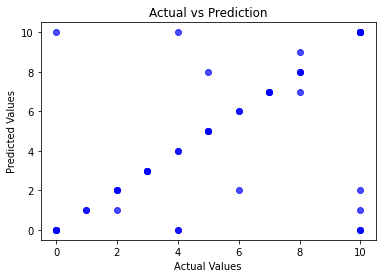

In [30]:
# Scatter plit for co relation between actual values and predicted values.
plt.scatter(fil_df['Actual'], fil_df['Prediction'], alpha=.7, color = 'b')
# Naming x and y label
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# # Printing title
plt.title('Actual vs Prediction')
plt.show()